In [8]:
#preprocess step...

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATAPATH
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")




# DEFINE FEATURE
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]



# IDENTIFY MISSING VALUES
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

# FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARDFILL
df.fillna(method='ffill', inplace=True)

# FILL MISSING VALUES WITH BACKWARDFILL
df.fillna(method='bfill', inplace=True)



# HANDLEOUTLIERS
df = handle_outliers(df, 'Churn')




# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)


# DEFINE CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']


# NORMALIZE AND SCALE ALL NUMERIC COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])




print(df)
print(df.head())
print(df.shape)
print(df.info())
print(df.corr())


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_2260\2637192544.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


        Customer ID        Purchase Date Product Category  Product Price  \
0          1.358461  2023-05-03 21:30:02             Home      -0.547342   
1          1.358461  2021-05-16 13:57:44      Electronics      -0.568472   
2          1.358461  2020-07-13 06:16:57            Books       1.114859   
3          1.358461  2023-01-17 13:14:36      Electronics       0.995125   
4          1.358461  2021-05-01 11:29:27            Books       0.030202   
...             ...                  ...              ...            ...   
249994     1.025616  2021-08-01 04:43:12      Electronics      -0.209267   
249995     0.609543  2023-01-24 12:32:18             Home       1.276854   
249996    -0.316514  2021-06-04 05:45:25      Electronics      -0.152922   
249998    -0.693262  2021-06-27 14:42:12      Electronics      -1.484092   
249999    -1.447521  2020-09-07 05:12:19             Home       0.368277   

        Quantity  Total Purchase Amount Payment Method  Customer Age  \
0      -1.42038

C:\Users\nh013\AppData\Local\Temp\ipykernel_2260\2637192544.py:72: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# FUNCTION HANDLEOUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATAPATH
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")




# DEFINE FEATURE 
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]



# IDENTIFY MISSING VALUES
print(df.isnull().sum())



# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)



# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)



# FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)



# FILL MISSING VALUES WITH FORWARDFILL
df.fillna(method='ffill', inplace=True)



#FILL MISSING VALUES WITH BACKWARDFILL
df.fillna(method='bfill', inplace=True)



# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')



# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)



#LIST OF CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']



# LABEL ENCODE CATEGORICAL COLUMN
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

    
    
# NORMALIZE AND SCALE ALL NUMERIC COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])




print(df)
print(df.head())
print(df.shape)
print(df.info())
print(df.corr())


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_2260\3962599304.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


        Customer ID  Purchase Date  Product Category  Product Price  Quantity  \
0          1.358461       1.393351          1.339380      -0.547342 -1.420385   
1          1.358461      -0.449862          0.444462      -0.568472 -0.007085   
2          1.358461      -1.236051         -1.345373       1.114859 -1.420385   
3          1.358461       1.121573          0.444462       0.995125 -0.007085   
4          1.358461      -0.488684         -1.345373       0.030202  0.699565   
...             ...            ...               ...            ...       ...   
249994     1.025616      -0.252474          0.444462      -0.209267  1.406215   
249995     0.609543       1.139261          1.339380       1.276854 -1.420385   
249996    -0.316514      -0.400997          0.444462      -0.152922 -1.420385   
249998    -0.693262      -0.341425          0.444462      -1.484092 -0.713735   
249999    -1.447521      -1.093138          1.339380       0.368277  1.406215   

        Total Purchase Amou

In [18]:
#perform some feature engineering like 
#Calculate the frequency of purchases for each customer
#Calculate the average purchase amount for each customer
#Find the most purchased categories for each customer
# Calculate the return rate (returns divided by total purchases).....


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# FUNCTION FOR HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATAPATH
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")



# DEFINE FEATURE
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]




# IDENTIFYING MISSING VALUES
print(df.isnull().sum())



# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)




# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)


# FILL MISSING VALUE WITH MODE 
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)


#FILL MISSING VALUES WITH BACKWARD FILL
df.fillna(method='bfill', inplace=True)



# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')


# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)


#LIST OF CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']


# LABEL ENCODE CATEGORICAL COLUMN
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

    
# NORMALIZE AND SCALE ALL NUMERIC COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



# CALCULATE THE FREQUENCY OF PURCHASE  FOR EACH CUSTOMER
customer_purchase_frequency = df.groupby('Customer ID')['Purchase Date'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Purchase Date': 'Purchase Frequency'}, inplace=True)




# MERGE THE FREQUENCY PURCHASE BACK  INTO THE ORGINAL DATAFRAME 
df = df.merge(customer_purchase_frequency, on='Customer ID', how='left')



# CALCULATE THE AVERAGE PURCHASE AMOUNT FOR EACH CUSTOMER 
average_purchase_amount = df.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
average_purchase_amount.rename(columns={'Total Purchase Amount': 'Average Purchase Amount'}, inplace=True)



# MERGE THE CALCULATE AVERAGE PURCHASE  AMOUNT BACK INTO THE ORGINAL DATAFRAME 
df = df.merge(average_purchase_amount, on='Customer ID', how='left')


# ONE-HOT ENCODE THE  "PRODUCT CATEGORY" COLUMN
df = pd.get_dummies(df, columns=['Product Category'], prefix='Product_Category')



# GROUP BY "CUSTOMER ID" AND SUM THE  ONE-HOT ENCODEDCOLUMN
product_category_preferences = df.groupby('Customer ID')[df.columns[df.columns.str.startswith('Product_Category_')]].sum().reset_index()



# FIND THE MOST PURCHASE CATEGORY FOR EACH CUSTOMER 
product_category_preferences['Most_Purchased_Category'] = product_category_preferences.iloc[:, 1:].idxmax(axis=1)




# CALCULATE THE TOTAL NUMBER OF PURCHASE FOR EACH CUSTOMER 
total_purchases = df.groupby('Customer ID')['Returns'].count().reset_index()
total_purchases.rename(columns={'Returns': 'Total Purchases'}, inplace=True)


# CALCULATE THE TOTAL NUMER OF RETURN FOR EACH CUSTOMER 
total_returns = df.groupby('Customer ID')['Returns'].sum().reset_index()



# MERGE THE TOTAL PURCHASE AND TOTAL RETURNS INTO A SINGLE DATAFRAME 
return_rate_data = total_purchases.merge(total_returns, on='Customer ID', how='left')


# CALCULATE THE RETURN RATE  (RETURNS DEVIDED  BY  TOTAL PURCHASE )
return_rate_data['Return Rate'] = return_rate_data['Returns'] / return_rate_data['Total Purchases']





print(df)
print(df.head())
print(df.shape)
print(df.info())
print(product_category_preferences)
print(return_rate_data)



Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_2260\4269076238.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


        Customer ID  Purchase Date  Product Price  Quantity  \
0          1.358461       1.393351      -0.547342 -1.420385   
1          1.358461      -0.449862      -0.568472 -0.007085   
2          1.358461      -1.236051       1.114859 -1.420385   
3          1.358461       1.121573       0.995125 -0.007085   
4          1.358461      -0.488684       0.030202  0.699565   
...             ...            ...            ...       ...   
161869     1.025616      -0.252474      -0.209267  1.406215   
161870     0.609543       1.139261       1.276854 -1.420385   
161871    -0.316514      -0.400997      -0.152922 -1.420385   
161872    -0.693262      -0.341425      -1.484092 -0.713735   
161873    -1.447521      -1.093138       0.368277  1.406215   

        Total Purchase Amount  Payment Method  Customer Age   Returns  \
0                   -0.206654        1.222989     -0.838094  0.996313   
1                   -0.192109        1.222989     -0.838094  0.996313   
2                   -0.2

In [20]:
#PERFORM XGBOOST MODEL.....

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# FUNCTION FOR HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATAPATH
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")



# DEFINE FEATURE
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]




# IDENTIFYING MISSING VALUES
print(df.isnull().sum())



# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)




# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)


# FILL MISSING VALUE WITH MODE 
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)


#FILL MISSING VALUES WITH BACKWARD FILL
df.fillna(method='bfill', inplace=True)



# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')


# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)


#LIST OF CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']


# LABEL ENCODE CATEGORICAL COLUMN
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

    
# NORMALIZE AND SCALE ALL NUMERIC COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



# CALCULATE THE FREQUENCY OF PURCHASE  FOR EACH CUSTOMER
customer_purchase_frequency = df.groupby('Customer ID')['Purchase Date'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Purchase Date': 'Purchase Frequency'}, inplace=True)




# MERGE THE FREQUENCY PURCHASE BACK  INTO THE ORGINAL DATAFRAME 
df = df.merge(customer_purchase_frequency, on='Customer ID', how='left')



# CALCULATE THE AVERAGE PURCHASE AMOUNT FOR EACH CUSTOMER 
average_purchase_amount = df.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
average_purchase_amount.rename(columns={'Total Purchase Amount': 'Average Purchase Amount'}, inplace=True)



# MERGE THE CALCULATE AVERAGE PURCHASE  AMOUNT BACK INTO THE ORGINAL DATAFRAME 
df = df.merge(average_purchase_amount, on='Customer ID', how='left')


# ONE-HOT ENCODE THE  "PRODUCT CATEGORY" COLUMN
df = pd.get_dummies(df, columns=['Product Category'], prefix='Product_Category')



# GROUP BY "CUSTOMER ID" AND SUM THE  ONE-HOT ENCODEDCOLUMN
product_category_preferences = df.groupby('Customer ID')[df.columns[df.columns.str.startswith('Product_Category_')]].sum().reset_index()



# FIND THE MOST PURCHASE CATEGORY FOR EACH CUSTOMER 
product_category_preferences['Most_Purchased_Category'] = product_category_preferences.iloc[:, 1:].idxmax(axis=1)




# CALCULATE THE TOTAL NUMBER OF PURCHASE FOR EACH CUSTOMER 
total_purchases = df.groupby('Customer ID')['Returns'].count().reset_index()
total_purchases.rename(columns={'Returns': 'Total Purchases'}, inplace=True)


# CALCULATE THE TOTAL NUMER OF RETURN FOR EACH CUSTOMER 
total_returns = df.groupby('Customer ID')['Returns'].sum().reset_index()



# MERGE THE TOTAL PURCHASE AND TOTAL RETURNS INTO A SINGLE DATAFRAME 
return_rate_data = total_purchases.merge(total_returns, on='Customer ID', how='left')


# CALCULATE THE RETURN RATE  (RETURNS DEVIDED  BY  TOTAL PURCHASE )
return_rate_data['Return Rate'] = return_rate_data['Returns'] / return_rate_data['Total Purchases']


# DEFINE FEATURE AND TARGET VARIABLE 
X = df.drop(columns=['Churn', 'Customer ID'])
y = df['Churn']

# SPLIT DATASET INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# XGBOOST CLASSIFIRE
clf = xgb.XGBClassifier()

# DEFINE HYPERPARAMETERS TO SEARCH FOR  USING GRIDSEARCHCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}


# GRIS SEARCH PERFORM FOR HYPERPARA MERTER TUNING 
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


#GET THE BEST PARAMETER FOR GRID SEARCH 
best_params = grid_search.best_params_



# TRAIN THE XGBOOST MODEL WITH BEST PARAMETER
clf = xgb.XGBClassifier(**best_params)
clf.fit(X_train, y_train)



# PREDICTION ON TEST SET
y_pred = clf.predict(X_test)

# EVALUATE 
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)


C:\Users\nh013\AppData\Local\Temp\ipykernel_2260\1991354078.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39974

    accuracy                           1.00     39974
   macro avg       1.00      1.00      1.00     39974
weighted avg       1.00      1.00      1.00     39974



In [7]:
#PERFORM LINEAR REGRESSION MODEL

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATAPATH
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")

# FEATURE SELECTION
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]


# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

# FILL MISSING VALUES WITH MODE 
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

# FILL MISSING VALUES WITH BACKWARD FILL
df.fillna(method='bfill', inplace=True)

#HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# LIST OF CATEGORICAL COLUMNS
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']

# LABEL ENCODE CATEGORICAL COLUMN 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

    
    
    
# NORMALIZE AND SCALE ALL NUMERIC COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# CALCULATE THE FREQUENCY OF PURCHASE FOR EACH CUSTOMER 
customer_purchase_frequency = df.groupby('Customer ID')['Purchase Date'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Purchase Date': 'Purchase Frequency'}, inplace=True)

# MERGE THE CALCULATED PURCHASE FREQUENCY BACK INTO THE ORGINAL DATAFRAME 
df = df.merge(customer_purchase_frequency, on='Customer ID', how='left')


#CALCULATE THE AVERAGE PURCHASE AMOUNT FOR EACH CUSTOMER  
average_purchase_amount = df.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
average_purchase_amount.rename(columns={'Total Purchase Amount': 'Average Purchase Amount'}, inplace=True)

#MERGE THE CALCULATED AVERAGE PURCHASE AMOUNT  BACK INTO THE ORGINAL DATAFRAME  
df = df.merge(average_purchase_amount, on='Customer ID', how='left')


#CALCULATE THE TOTAL NUMBER OF PURCHASES FOR EACH CUSTOMER  
total_purchases = df.groupby('Customer ID')['Returns'].count().reset_index()
total_purchases.rename(columns={'Returns': 'Total Purchases'}, inplace=True)


#CALCULATE THE TOTAL NUMBER OF RETURNS FOR EACH CUSTOMER  
total_returns = df.groupby('Customer ID')['Returns'].sum().reset_index()


#MERGE THE TOTAL PURCHASE AND TOTAL RETURNS IN TO SINGLE DATAFRAME  
return_rate_data = total_purchases.merge(total_returns, on='Customer ID', how='left')

#CALCULATE THE RETURN RATE (returns divided by total purchases)
return_rate_data['Return Rate'] = return_rate_data['Returns'] / return_rate_data['Total Purchases']


#MERGE THE CALCULATED RETURN RATE BACK INTO THE ORGINAL DATAFRAME  
df = df.merge(return_rate_data[['Customer ID', 'Return Rate']], on='Customer ID', how='left')


# DEFINE FEATURE AND TERGATE VARIABLE 
X = df[['Purchase Frequency', 'Average Purchase Amount', 'Return Rate']]
y = df['Customer ID']  # Replace 'Customer Lifetime Value' with the actual column name


# SPLIT DATA SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL
model = LinearRegression()

# FIT MODEL ON TRAIN DATA
model.fit(X_train, y_train)


# PREDICTION ON TEST DATA
y_pred = model.predict(X_test)

# MODEL EVALUATION
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_14544\761432182.py:36: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Mean Squared Error: 1.0020848048361868
R-squared (R2) Score: -1.802436731512813e-05
Coefficients: [ 1.34772765e-03 -2.07254178e-03 -3.30358894e-05]
Intercept: -0.007663162006540437


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATA
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")



# DEFINE FEATURE 
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]




# IDENTIFY MISSING VALUES 
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES 
df.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

# FILL MISSING VALUES WITH MODE 
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# FILL MISSING VALUES WITG FORWARDWARD FILL
df.fillna(method='ffill', inplace=True)

# FILL MISSING VALUES WITH BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUPLICATES ROWS 
df.drop_duplicates(inplace=True)

# DEFINE CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']

# LABEL ENCODE FOR CATEGORICAL COLUMN
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# CALCULATE THE FREQUENCY OF PURCHASE FOR EACH CUSTOMER 
customer_purchase_frequency = df.groupby('Customer ID')['Purchase Date'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Purchase Date': 'Purchase Frequency'}, inplace=True)

# MERGE THE CALCULATED PURCHASE FREQUENCY BACK INTO THE ORGINAL DATAFRAME
df = df.merge(customer_purchase_frequency, on='Customer ID', how='left')




# CALCULATE THE AVERAGE PURCHASE AMOUNT FOR EACH CUSTOMER  
average_purchase_amount = df.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
average_purchase_amount.rename(columns={'Total Purchase Amount': 'Average Purchase Amount'}, inplace=True)

# MERGE THE CALCULATED AVERAGE PURCHASE AMOUNT  BACK INTO THE ORGINAL DATAFRAME  
df = df.merge(average_purchase_amount, on='Customer ID', how='left')





#CALCULATE THE TOTAL NUMBER OF PURCHASES FOR EACH CUSTOMER  
total_purchases = df.groupby('Customer ID')['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'Total Purchases'}, inplace=True)

#CALCULATE THE TOTAL NUMBER OF RETURNS FOR EACH CUSTOMER  
total_returns = df.groupby('Customer ID')['Returns'].sum().reset_index()


#MERGE THE TOTAL PURCHASE AND TOTAL RETURNS IN TO SINGLE DATAFRAME
return_rate_data = total_purchases.merge(total_returns, on='Customer ID', how='left')


#CALCULATE THE RETURN RATE (returns divided by total purchases)
return_rate_data['Return Rate'] = return_rate_data['Returns'] / return_rate_data['Total Purchases']


#MERGE THE CALCULATED RETURN RATE BACK INTO THE ORGINAL DATAFRAME
df = df.merge(return_rate_data[['Customer ID', 'Return Rate']], on='Customer ID', how='left')





# DEFINE FEATURE AND TERGET VARIABLE 
X = df[['Purchase Frequency', 'Average Purchase Amount', 'Return Rate']]
y = df['Churn']  # 'Churn' is the behavior to predict (1 for churned, 0 for not churned)

# SPLIT DATA 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZE AND SCALE FEATURE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN MODEL 
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),   # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')   # Output layer with a sigmoid activation for binary classification
])

# COMPILE MODEL
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TRAIN MODEL
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# EVALUATION ON TEST SET 
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# PREDICT CISTOMER VEHAVIOUR ON NEW DATASET 
new_data = pd.DataFrame({
    'Purchase Frequency': [0.8, 0.5, 0.2],
    'Average Purchase Amount': [100, 50, 200],
    'Return Rate': [0.1, 0.2, 0.05]
})
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)



#LET'S PRINT CUSTOMER VIHEAVIOUR PERCENTAGE 
behavior_percentage = (predictions.flatten() * 100).tolist()
print("Customer Behavior Percentages:")
for i, percentage in enumerate(behavior_percentage):
    print(f"Customer {i+1}: {percentage:.2f}% Churn Probability")


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_10968\204692001.py:36: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Epoch 1/10
3238/3238 [==============================] - 9s 2ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 3.5027e-06 - val_accuracy: 1.0000
Epoch 2/10
3238/3238 [==============================] - 7s 2ms/step - loss: 1.3500e-06 - accuracy: 1.0000 - val_loss: 3.7713e-07 - val_accuracy: 1.0000
Epoch 3/10
3238/3238 [==============================] - 7s 2ms/step - loss: 1.6919e-07 - accuracy: 1.0000 - val_loss: 5.6671e-08 - val_accuracy: 1.0000
Epoch 4/10
3238/3238 [==============================] - 7s 2ms/step - loss: 2.6737e-08 - accuracy: 1.0000 - val_loss: 9.6938e-09 - val_accuracy: 1.0000
Epoch 5/10
3238/3238 [==============================] - 7s 2ms/step - loss: 4.7973e-09 - accuracy: 1.0000 - val_loss: 1.9067e-09 - val_accuracy: 1.0000
Epoch 6/10
3238/3238 [==============================] - 7s 2ms/step - loss: 1.0101e-09 - accuracy: 1.0000 - val_loss: 4.6022e-10 - val_accuracy: 1.0000
Epoch 7/10
3238/3238 [==============================] - 8s 2ms/step - loss: 2.7424e-10 - acc

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_14008\2554987151.py:42: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Epoch 1/50
3238/3238 [==============================] - 14s 4ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 3.9115e-06 - val_accuracy: 1.0000
Epoch 2/50
3238/3238 [==============================] - 12s 4ms/step - loss: 1.5150e-06 - accuracy: 1.0000 - val_loss: 4.2913e-07 - val_accuracy: 1.0000
Epoch 3/50
3238/3238 [==============================] - 13s 4ms/step - loss: 1.9305e-07 - accuracy: 1.0000 - val_loss: 6.5125e-08 - val_accuracy: 1.0000
Epoch 4/50
3238/3238 [==============================] - 12s 4ms/step - loss: 3.0623e-08 - accuracy: 1.0000 - val_loss: 1.1085e-08 - val_accuracy: 1.0000
Epoch 5/50
3238/3238 [==============================] - 12s 4ms/step - loss: 5.4498e-09 - accuracy: 1.0000 - val_loss: 2.1563e-09 - val_accuracy: 1.0000
Epoch 6/50
3238/3238 [==============================] - 12s 4ms/step - loss: 1.1390e-09 - accuracy: 1.0000 - val_loss: 5.1980e-10 - val_accuracy: 1.0000
Epoch 7/50
3238/3238 [==============================] - 12s 4ms/step - loss: 3.0765e-1

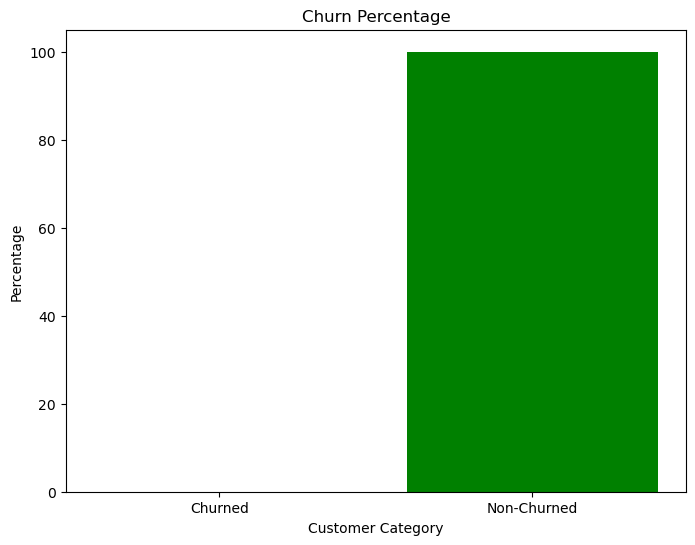

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt 

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATA
df = pd.read_csv(r"C:\Users\nh013\Desktop\e-cCustomer Data For Behavior Analysis\ecommerce_customer_data_large.csv")



# DEFINE FEATURE 
selected_columns = [
    'Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 
    'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 
    'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'
]
df = df[selected_columns]




# IDENTIFY MISSING VALUES 
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES 
df.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

# FILL MISSING VALUES WITH MODE 
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# FILL MISSING VALUES WITG FORWARDWARD FILL
df.fillna(method='ffill', inplace=True)

# FILL MISSING VALUES WITH BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUPLICATES ROWS 
df.drop_duplicates(inplace=True)

# DEFINE CATEGORICAL COLUMN
categorical_columns = ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']

# LABEL ENCODE FOR CATEGORICAL COLUMN
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# CALCULATE THE FREQUENCY OF PURCHASE FOR EACH CUSTOMER 
customer_purchase_frequency = df.groupby('Customer ID')['Purchase Date'].nunique().reset_index()
customer_purchase_frequency.rename(columns={'Purchase Date': 'Purchase Frequency'}, inplace=True)

# MERGE THE CALCULATED PURCHASE FREQUENCY BACK INTO THE ORGINAL DATAFRAME
df = df.merge(customer_purchase_frequency, on='Customer ID', how='left')




# CALCULATE THE AVERAGE PURCHASE AMOUNT FOR EACH CUSTOMER  
average_purchase_amount = df.groupby('Customer ID')['Total Purchase Amount'].mean().reset_index()
average_purchase_amount.rename(columns={'Total Purchase Amount': 'Average Purchase Amount'}, inplace=True)

# MERGE THE CALCULATED AVERAGE PURCHASE AMOUNT  BACK INTO THE ORGINAL DATAFRAME  
df = df.merge(average_purchase_amount, on='Customer ID', how='left')





#CALCULATE THE TOTAL NUMBER OF PURCHASES FOR EACH CUSTOMER  
total_purchases = df.groupby('Customer ID')['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'Total Purchases'}, inplace=True)

#CALCULATE THE TOTAL NUMBER OF RETURNS FOR EACH CUSTOMER  
total_returns = df.groupby('Customer ID')['Returns'].sum().reset_index()


#MERGE THE TOTAL PURCHASE AND TOTAL RETURNS IN TO SINGLE DATAFRAME
return_rate_data = total_purchases.merge(total_returns, on='Customer ID', how='left')


#CALCULATE THE RETURN RATE (returns divided by total purchases)
return_rate_data['Return Rate'] = return_rate_data['Returns'] / return_rate_data['Total Purchases']


#MERGE THE CALCULATED RETURN RATE BACK INTO THE ORGINAL DATAFRAME
df = df.merge(return_rate_data[['Customer ID', 'Return Rate']], on='Customer ID', how='left')





# DEFINE FEATURE AND TERGET VARIABLE 
X = df[['Purchase Frequency', 'Average Purchase Amount', 'Return Rate', 'Customer Name']]
y = df['Churn']  # 'Churn' is the behavior to predict (1 for churned, 0 for not churned)

# SPLIT DATA 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZE AND SCALE FEATURE 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Purchase Frequency', 'Average Purchase Amount', 'Return Rate']])
X_test_scaled = scaler.transform(X_test[['Purchase Frequency', 'Average Purchase Amount', 'Return Rate']])

# RNN MODEL 
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    keras.layers.Dense(64, activation='relu'),   # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')   # Output layer with a sigmoid activation for binary classification
])

# COMPILE MODEL 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TRAIN MODLE 
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# EVALUATE ON TEST SET 
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# PREDICT CUNSTOMER BEHAVIOUR ON TEST SET 
test_predictions = model.predict(X_test_scaled)

#ROUND THE PREDICTIONS TO BINARY VALUES 0 OR 1 
threshold = 0.5
predicted_labels = (test_predictions > threshold).astype(int)

# ADD PRIDEICTED LABELS TO THE TEST DATAFRAME 
X_test['Predicted Churn'] = predicted_labels


churned_customers = X_test[X_test['Predicted Churn'] == 1]['Customer Name']
non_churned_customers = X_test[X_test['Predicted Churn'] == 0]['Customer Name']

print("Churned Customers:")
print(churned_customers)
print("\nNon-Churned Customers:")
print(non_churned_customers)


churn_percentage = (predicted_labels.sum() / len(predicted_labels)) * 100

# Plot a bar chart to visualize churn percentage
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Non-Churned'], [churn_percentage, 100 - churn_percentage], color=['red', 'green'])
plt.title('Churn Percentage')
plt.xlabel('Customer Category')
plt.ylabel('Percentage')
plt.show()